# HW 3: Midterm Review
Submitted by: Gideon Tay\
My UNI: gt2528\
Contact me at: gideon.tay@columbia.edu

## Part A
### A1. Describe the importance of training and test data.  Why do we separate data into these subsets?

In supervised learning, we separate data into training and test subsets. The majority (e.g. 80%, 90% ) of data is usually assigned for training, with the rest of the data kept as a test dataset.

Each data subset serves a different purpose:

- Training data: used to train the model, where model parameters are adjusted to minimize differences between the model's predictions and the actual target values/ label for the training data. The model produced takes in features of each observation as input and gives a prediction of the observation's target value/ label as output.

- Test data: after training, the model's performance is evaluated based on unseen test data. This simulates the model's performance in the real world.

Separating the data is important for **realistic model performance evaluation** (accuracy, precision, recall, F1-score etc.) with unseen test data. Only then do we get a good sense of the model's generalizability outside of the training dataset.

Evaluating the model with data it is trained on is undesirable, as it could lead to **overfitting**. This occurs when the model gets tuned excessively to the idiosyncracies of the training data, such that it performs well with the training data but poorly with unseen data.

### A2. What is k-fold cross validation and what do we use it for?

In k-fold cross-validation, the training dataset is split into k subsets (or "folds"). Then, the model is trained on (k-1) of the subsets, with the final subset used as a validation set to evaluate the trained model's performance. This process is repeated k times, with each fold used once as the validation set. The performance metric (e.g., accuracy, precision, F1-score) is averaged across the k iterations to give a more stable and reliable estimate of the model's performance.

K-fold validation can be used for:
- **Hyperparameter tuning**: observe how different parameter values affect the model's performance. For example, `GridSearchCV()` can be used to conduct k-fold cross-validation for a range of model parameter values, so the parameter values that produces the best performance can be selected

- **Model Selection**: compare different models and select the one that performs the best on average.

There are other variations of cross validation techniques such as stratified k-fold and repeated k-fold.

### A3. How is k-fold cross validation different from stratified k-fold cross validation?

**Underlying difference in data splitting**: Stratified k-fold cross validation ensures each fold has a similar distribution of the target variable (class labels) as the original dataset. This is unlike standard k-fold cross-validation where data is randomly divided into K folds without considering the class distribution.

**Application to imbalanced/ balanced datasets**: As a result, stratified k-fold is particularly useful for imbalanced datasets, where one class occurs much more frequently than the others. Meanwhile, standard the k-fold does not handle imbalanced data well. As some folds might contain very few or no instances of minority classes, the standard k-fold may produce biased or unreliable performance estimates. Nevertheless, standard k-fold is suitable for balanced datasets.

### A4. Name the 4 types of supervised learning models that we have learned thus far that are used to predict categorical dependent variables like whether an email is labeled “spam” or “not spam.”

4 supervised learning models that can be used to predict categorical dependent variables include:

1. **K-nearest neighbors (KNN)**: for a new observation, look at the k nearest neighbors in the training data, based on a distance metric like Euclidean distance. Then, predict the new observation's category with a majority vote of the k nearest neighbors (e.g. for k=5, if >2 nearest neighbors are spam, classify new observation as spam)

2. **Logistic regression**: predict the probability of a binary outcome (spam or not spam) with a logistic function. This can be conducted **with or without penalty terms** (e.g. L1 and L2 penalty for small).

3. **Support Vector Machines (SVM)**: find the hyperplane that best separates the classes (spam or not spam) in the feature space, by maximizing the margin between the two classes.

4. **Decision Trees**: recursive binary splitting that splits data into subsets based on feature value, with each leaf node representing a class label (spam or not spam) based on the most commonly occuring class of training observations in that node. Performance of decision trees can be enhanced with **bagging, boosting, and random forests**.

### A5. Name the 3 types of supervised learning models that we have learned thus far that are used to predict continuous dependent variables like test scores.

3 types of supervised learning models that can be used to predict continuous dependent variables include:

1. **K-nearest neighbors (KNN)**: can also be used for continuous dependent variables. Instead of taking a majority vote among the K-nearest neighbors, take the mean value of their dependent variables.

2. **Linear regression**: a simple model that predicts a continuous output by fitting a linear relationship between the feature variables and the target dependent variable, by finding coefficients that minimize the **residual sum of squares**. You may include penalty terms to the objective function, in which case it is called **Ridge regression (L2 regulatrization)** or **Lasso regression (L1 regulatrization)**, depending on the penalty term used.

3. **Decision Trees**: can also be used for continuous dependent variables. Segment the predictor space into different regions. For every observation that falls into a region, make the same prediction, which is simply the mean of the training dataset's continuous dependent variable for that region.

## Part B
### B1. Import the spam dataset and print the first six rows.  

In [1]:
# Import libraries used in Part B1 to B3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import spam datset from local directory
df = pd.read_csv('spam_dataset.csv')

# Print first 6 rows
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### B2. Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I think these 3 variables will be important predictors in a model of spam:

1. `word_freq_free:` percentage of words in the email that match "free". The word "free" is commonly used in unsolicited commercial emails offering promotions, giveaways, or scams. Since people are attracted to the idea of getting things for free, the word "free" is often used to incentivize recipients to click through into unsolicited emails that they would otherwise ignore. While non-spam emails may use the word "free" (e.g. "when will you be free to schedule a meeting?"), they are likely to use it less frequently compared to spam emails.

2. `char_freq_!:` percentage of characters in the email that match "!". Exclamation marks are often used in spam emails to emphasize urgency, excitement, or to grab attention (e.g., "20% savings!", "Limited time offer!", "Buy now!"). Generally, exclamation marks are used less frequently in non-spam emails.

3. `capital_run_length_longest:` length of longest uninterrupted sequence of capital letters. Spam emails often capitalize words or phrases to grab attention (e.g. "SPECIAL OFFER"), while non-spam emails seldom capitalize entire words or phrases.

### B3. Visualize the univariate distribution of the 3 variables

To visualize the univariate distributions, we plot a histogram for each variable.

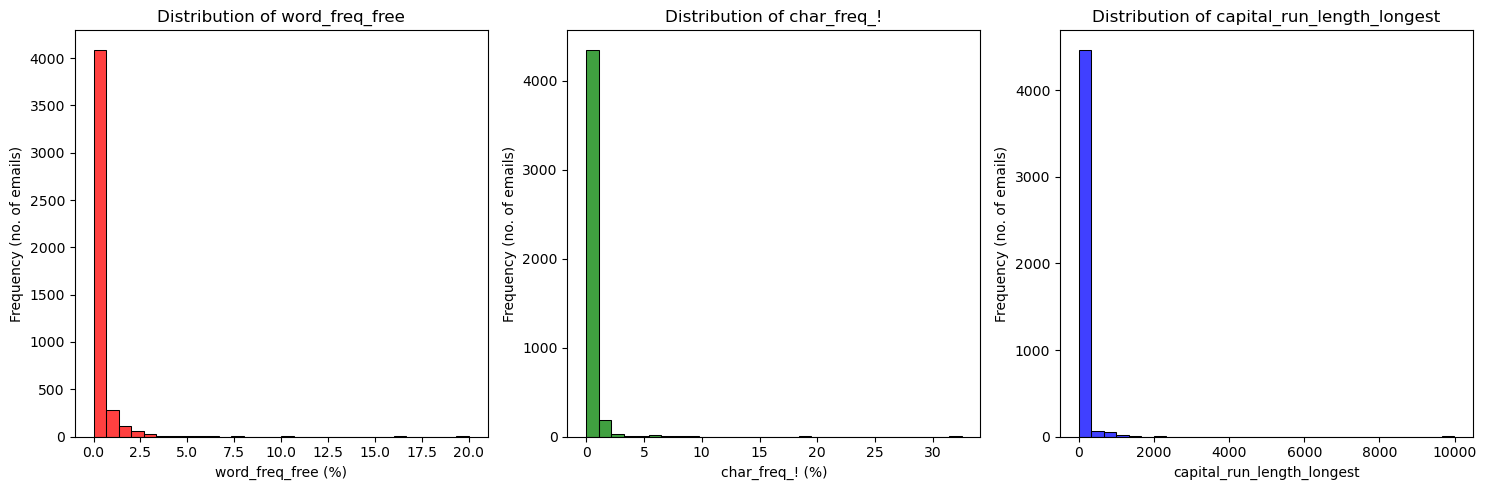

In [2]:
# Plotting the univariate distributions
plt.figure(figsize=(15, 5))

# Plot for word_freq_free
plt.subplot(1, 3, 1) # Plot 3 plots side by side
sns.histplot(df['word_freq_free:'], bins=30, color='red')
plt.title('Distribution of word_freq_free')
plt.xlabel('word_freq_free (%)')
plt.ylabel('Frequency (no. of emails)')

# Plot for char_freq_!
plt.subplot(1, 3, 2)
sns.histplot(df['char_freq_!:'], bins=30, color='green')
plt.title('Distribution of char_freq_!')
plt.xlabel('char_freq_! (%)')
plt.ylabel('Frequency (no. of emails)')

# Plot for capital_run_length_longest
plt.subplot(1, 3, 3)
sns.histplot(
    df['capital_run_length_longest:'], bins=30, color='blue'
    )
plt.title('Distribution of capital_run_length_longest')
plt.xlabel('capital_run_length_longest')
plt.ylabel('Frequency (no. of emails)')

# Show the plots
plt.tight_layout()
plt.show()

As you can see, an overwhelming majority of emails have a very low word percentage for the word "free" (<1%), very low character percentage for the character "!" (<2%), and short length of longest uninterrupted sequence of capital letters. This makes sense. As emails are free flowing text, it is probable that most emails do not include a specific word "free" or will not include it more than a few times. It is also likely that most emails do not have a "!" character and if they do, they will form a very small percentage of the total characters used since it is just a punctuation often used at the end of a line with many characters. It is also expected that most emails do not have long uninterrupted sequences of capital letters.

However, there are some emails with higher `word_freq_free`, `char_freq_!`, and `capital_run_length_longest` values. It is difficult to view these bars since they are very small relative to the lowest interval's bar. To visualize it better, let us use a logarithmic scale for the y-axis:

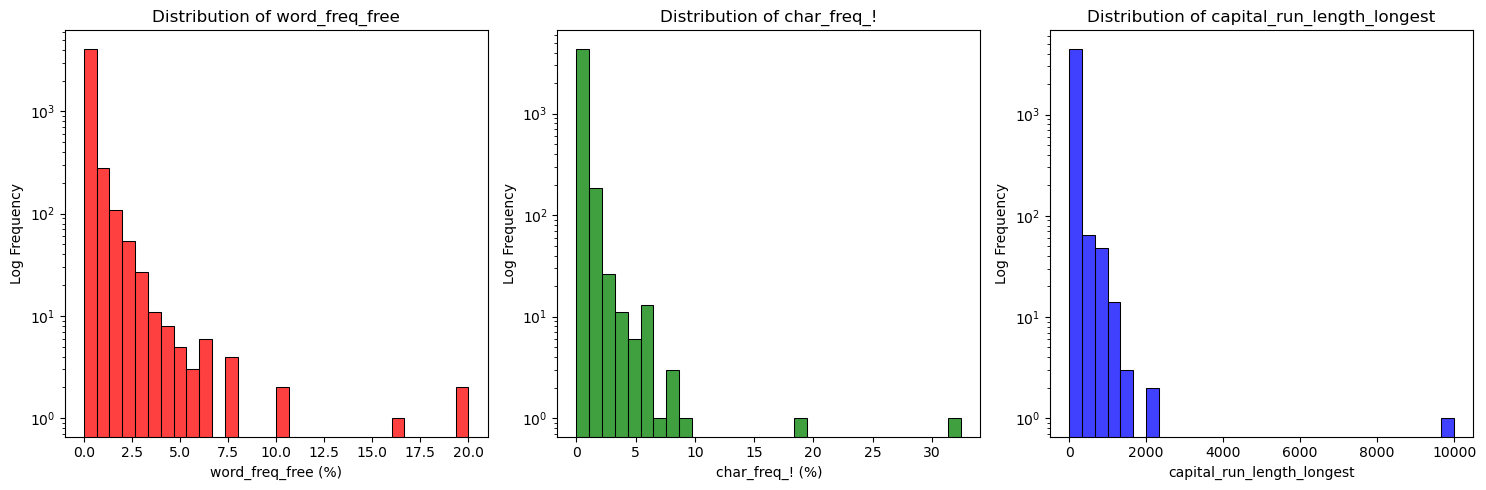

In [3]:
# Plotting the univariate distributions
plt.figure(figsize=(15, 5))

# Plot for word_freq_free
plt.subplot(1, 3, 1) # Plot 3 plots side by side
sns.histplot(df['word_freq_free:'], bins=30, color='red')
plt.yscale('log')
plt.title('Distribution of word_freq_free')
plt.xlabel('word_freq_free (%)')
plt.ylabel('Log Frequency')

# Plot for char_freq_!
plt.subplot(1, 3, 2)
sns.histplot(df['char_freq_!:'], bins=30, color='green')
plt.yscale('log')
plt.title('Distribution of char_freq_!')
plt.xlabel('char_freq_! (%)')
plt.ylabel('Log Frequency')

# Plot for capital_run_length_longest
plt.subplot(1, 3, 3)
sns.histplot(
    df['capital_run_length_longest:'], bins=30, color='blue'
    )
plt.yscale('log')
plt.title('Distribution of capital_run_length_longest')
plt.xlabel('capital_run_length_longest')
plt.ylabel('Log Frequency')

# Show the plots
plt.tight_layout()
plt.show()

With a logarithmic y-axis, we are able to see the other bars at higher `word_freq_free`, `char_freq_!`, and `capital_run_length_longest` values more clearly.

### B4. Split the data into training and test subsets.  Build a KNN model with the 3 predictor variables. Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model.

Firstly, let us import libraries needed for questions B4 to B8:

In [4]:
# Import libraries required for B4 to B8
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier # B4, B8
from sklearn.linear_model import LogisticRegression # B5, B8
from sklearn.svm import SVC # B6, B8, Support vector classifier
from sklearn.tree import DecisionTreeClassifier # B7, B8
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Next, split the data into training and test subsets, using only the 3 variables as features:

In [5]:
# Define the target column (y) and the feature columns (X)
y = df['spam']
X = df[[
    'word_freq_free:', 
    'char_freq_!:', 
    'capital_run_length_longest:'
    ]]

# Split the data into training and test sets (Default 75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
    )

# Print the shape of the resulting sets
print(
    f'Training set X: {X_train.shape}\n'
    f'Test set X: {X_test.shape}\n'
    f'Training set Y: {y_train.shape}\n'
    f'Test set Y: {y_test.shape}'
    )

Training set X: (3450, 3)
Test set X: (1151, 3)
Training set Y: (3450,)
Test set Y: (1151,)


Standardize the features using `StandardScaler()` which subtracts the mean and scales features to unit variance. Then, build a k-nearest neighbors classification model with `KNeighborsClassifier()`. Find the best parameter (number of neighbors) using `GridSearchCV()`, evaluating the prediction error with F1 scores and stratified 5-fold cross-validation without shuffling. F1 scores can be interpreted as a weighted average of the precision and recall, and is a well-balanced, commonly used scoring method for classification problems.

In [26]:
# Create a pipeline with scaling
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Set up and fit GridSearchCV to find the best parameter value
grid = GridSearchCV(
    pipe,
    # parameter grid, test odd values only so no tie
    {'kneighborsclassifier__n_neighbors': np.arange(1, 21, 2)},
    cv=5, # Stratified K-fold cross-validation w/o shuffling
    scoring='f1' # Use F1 score as the scoring method
    )
grid.fit(X_train, y_train)

# Get results into a dataframe
results = [{
        'Model': 'KNN Model',
        'Mean cross-validated F1 score': round(grid.best_score_, 3),
        'Best parameter': grid.best_params_,
        'Test set F1 score': round(grid.score(X_test, y_test), 3)
        }]
knn_results = pd.DataFrame(results)

# Set display to wrap text within columns for dataframes
pd.set_option('display.max_colwidth', None) 

# Display results
knn_results

,Model,Mean cross-validated F1 score,Best parameter,Test set F1 score
0,KNN Model,0.807,{'kneighborsclassifier__n_neighbors': 11},0.798


From our results, k=11 produces the best mean cross-validated F1 score of 0.807 in the k-nearest neighbors classification model under our training set. With the unseen test set, this 11-neighbor KNN model has a F1 score of 0.798.

### B5. Build a logistic regression model

For logistic regression models, there are two key tuning parameters: the penalty term (no penalty, L1, L2,or elasticnet) and `C` (the strength of the penalty term, if present). The choice of the parameters affect the cost function we optimize and thus affects the model.

To test all possible parameter values, we first create a dictionary called `logistic_models`, which includes models and parameter grids to test. Then, we define the `evaluate_models()` function which finds the best parameter within each parameter grid which maximises the mean cross-validated F1 score based on a 5-fold stratified cross-validation without shuffling.

Note that:

- There are no parameters to tune for plain logistic regression without penalty terms
- For penalized logistic regressions, the `C` parameter has to be tuned. This is the inverse of regularization strength.
- For Elasticnet-penalized logistic regression, an additional `l1_ratio` parameter needs to be tuned, where `0 <= l1_ratio <= 1` determines the mix of L1 and L2 penalties that the elastic-net mixing parameter employs.

In [7]:
# Define the models and their parameter grids
# Solvers were chosen based on recommendations in the docs
logistic_models = {
    'Logistic Regression': (
        LogisticRegression(penalty=None, solver='newton-cholesky'),  
        {}  # No parameters for plain Logistic Regression
    ),
    'L1-penalized Logistic Regression': (
        LogisticRegression(penalty='l1', solver='liblinear'),
        {'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000]}
    ),
    'L2-penalized Logistic Regression': (
        LogisticRegression(penalty='l2', solver='liblinear'),
        {'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000]} 
    ),
    'Elasticnet-penalized Logistic Regression': (
        LogisticRegression(
            penalty='elasticnet', solver='saga', max_iter=5000
            ),
        {'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000],
         'logisticregression__l1_ratio': np.arange(0, 1, 0.1)
         } 
    )
}

# Function to evaluate models with tuning
def evaluate_models(X_train, y_train, X_test, y_test, model_dict):
    results = [] # create an empty list to store dictionaries
    for name, (model, params) in model_dict.items():
        # Create pipeline with scaling
        pipe = make_pipeline(StandardScaler(), model)
        
        # Set up GridSearchCV if parameters are present
        if params:
            grid = GridSearchCV(pipe, params, cv=5, scoring='f1')
            grid.fit(X_train, y_train)
            results.append({
                'Model': name,
                'Mean cross-validated F1 score': round(grid.best_score_, 3),
                'Best parameter': grid.best_params_,
                'Test set F1 score': round(grid.score(X_test, y_test), 3)
            })
        else: # For models w/o parameters, just fit the model
            scores = cross_val_score(
                pipe, X_train, y_train, scoring='f1', cv=5
                )
            pipe.fit(X_train, y_train)
            results.append({
                'Model': name,
                'Mean cross-validated F1 score': round(np.mean(scores), 3),
                'Best parameter': 'N/A',
                'Test set F1 score': round(pipe.score(X_test, y_test), 3)
            })
    return pd.DataFrame(results) # produce dataframe from results

# Set display to wrap text within columns for dataframes
pd.set_option('display.max_colwidth', None)  # Set None for no limit or a specific width for wrapping

# Evaluate models and display results in a table format
logistic_results = evaluate_models(
    X_train, y_train, X_test, y_test, logistic_models
    )
logistic_results

,Model,Mean cross-validated F1 score,Best parameter,Test set F1 score
0,Logistic Regression,0.677,N/A,0.790
1,L1-penalized Logistic Regression,0.677,{'logisticregression__C': 100},0.686
2,L2-penalized Logistic Regression,0.677,{'logisticregression__C': 100},0.686
3,Elasticnet-penalized Logistic Regression,0.677,"{'logisticregression__C': 100, 'logisticregression__l1_ratio': 0.0}",0.684


Among penalized logistic regressions, C=100 produces the best mean cross-validated F1 score. For elasticnet-penalized logistic regression, the best l1_ratio is 0, which is equivalent to a L2 penalty without mixing. The mean cross-validated F1 score for all models are similar at 0.677.

Overall, the model with the highest test set F1 score is the plain logistic regression (F1 score = 0.790). Hence, among the models investigated, we will choose a plain logistic regression without penalties.

### B6. Build a support vector machine (SVM) model

We will consider support vector classification models with linear and radial basis function kernels.

Moreover, we will tune the following parameters:
- `C`: controls margin hardness, with higher C meaning harder margins
- `gamma`: controls the size of the radial basis function kernel (not relevant for linear SVM models). We test the following values of gamma
    - 0.0001, 0.001, 0.01
    - 'scale': gamma = 1 / (n_features * X.var())
    - 'auto': gamma = 1 / n_features
- `class_weight`: can be used to bias the model towards under-represented classes to improve predictions for the minority class
    - None: all classes are given weight equal to one
    - 'balanced': adjust weights to be inversely proportional to class frequencies in the input data [n_samples / (n_classes * np.bincount(y))]

To do so, we set up a dictionary `svm_models` with the models and parameter grids we wish to test, and pass it into the `evaluate_models` function we defined earlier. 

Note: this code takes quite some time to run (5 min), please be patient

In [8]:
svm_models = {
    'SVC (rbf)': (
        SVC(kernel='rbf'),  
        {'svc__C': [1, 100, 10000],
         'svc__gamma': [0.0001, 0.001, 0.01, 'scale', 'auto'],
         'svc__class_weight': [None, 'balanced']}
    ),
    'SVC (linear)': (
        SVC(kernel='linear'),  
        {'svc__C': [1, 100, 10000],
         'svc__class_weight': [None, 'balanced']}
    )
}

# Set display to wrap text within columns for dataframes
pd.set_option('display.max_colwidth', None)

# Evaluate models and display results in a table format
svm_results = evaluate_models(
    X_train, y_train, X_test, y_test, svm_models
    )
svm_results

,Model,Mean cross-validated F1 score,Best parameter,Test set F1 score
0,SVC (rbf),0.796,"{'svc__C': 10000, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}",0.803
1,SVC (linear),0.739,"{'svc__C': 100, 'svc__class_weight': 'balanced'}",0.753


From the results, we see that a radial basis function kernel performs better than a linear kernel, given higher mean cross-validated F1 scores with the training data set and better test set F1 scores as well.

Across all the combinations of paramaters we have tried out, the model producing the highest mean cross-validated F1 score of 0.796 is a SVM model with:
- radial basis function kernel,
- C = 10,000 (relatively hard margin),
- scaled gamma, so gamma = 1 / (n_features * X.var()), and
- balanced class weight

### B7. Build a decision tree model

There are multiple variations of tree-based classification models we consider. Firstly, we consider a simple classification tree (decision tree) where we tune the following parameters:

- `criterion`: the function used to measure the quality of a split and used as a basis for making the binary splits. We consider the gini index and cross-entropy as possible criteria

- Tree size-related parameters
    - `max_depth`: the maximum number of times internal nodes are split. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    - `min_samples_leaf`: the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

Secondly, we consider random forests. Random forests use a bagging (bootstrap aggregation) approach, which takes repeated samples from the training dataset to produce multiple bootstrapped datasets upon which classification trees are built. The overall prediction is the majority vote prediction among the multiple classification trees built. 

Moreover, beyond standard bagging, random forest decorrelates the trees produced from bootstrapped datasets by taking a random selection of m predictors as split candidates out of the full set of p predictors at each split.

As such, we have to tune the following parameters for random forests:
- `criterion`
- Tree size-related parameters: `max_depth`, `min_samples_leaf`
- `n_estimators`: number of trees in the ensemble
- `max_features`: m, the number of random predictors to select out of p predictors at each split. When equal to None, then m=p which is a bagged ensemble of ordinary classification trees rather than random forests. 

Lastly, we consider boosted trees. Unlike bagging where each tree is built independently on separate bootstrap datasets, boosting grows trees sequentially, with each tree grown using information from previous trees. We tune the following parameters:
-  Tree size-related parameters: `max_depth`, `min_samples_leaf`
- `n_estimators`: number of boosting stages to perform
- `learning_rate`: controls the rate at which boosting learns

Let's run the code below (be patient, it took me 12min to run it):

In [19]:
decision_tree_models = {
    'Decision Tree': (
        DecisionTreeClassifier(),  
        {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
         'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
         'decisiontreeclassifier__min_samples_leaf': [
             1, 5, 10, 15]
         }
    ),
    'Random Forest': (
        RandomForestClassifier(),  
        {'randomforestclassifier__criterion': ['gini', 'entropy'],
         'randomforestclassifier__max_depth': [None, 10, 20, 30],
         'randomforestclassifier__min_samples_leaf': [
             1, 5, 10, 15],
         'randomforestclassifier__n_estimators': [10, 40, 70, 100],
         'randomforestclassifier__max_features': [
             None, 'sqrt', 'log2'] # None gives m=p so a bagged ensemble of ordinary regression trees
         }
    ),
    'Gradient Boosting Classifier': (
        GradientBoostingClassifier(random_state=42),  
        {'gradientboostingclassifier__max_depth': [
            None, 1, 3, 5],
         'gradientboostingclassifier__min_samples_leaf': [
             1, 5, 10, 15],
         'gradientboostingclassifier__n_estimators': [10, 40, 70, 100],
         'gradientboostingclassifier__learning_rate': [
             0.05, 0.1, 0.2]
         }
    )
}

# Set display to wrap text within columns for dataframes
pd.set_option('display.max_colwidth', None)

# Evaluate models and display results in a table format
decision_tree_results = evaluate_models(
    X_train, y_train, X_test, y_test, decision_tree_models
    )
decision_tree_results

,Model,Mean cross-validated F1 score,Best parameter,Test set F1 score
0,Decision Tree,0.807,"{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 10}",0.798
1,Random Forest,0.833,"{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 70}",0.829
2,Gradient Boosting Classifier,0.829,"{'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': None, 'gradientboostingclassifier__min_samples_leaf': 15, 'gradientboostingclassifier__n_estimators': 70}",0.820


From the results, a random forest produced the best mean cross-validated F1 score of 0.833 and test set F1 score of 0.829, compared to a simple decision tree or boosted trees, under the parameter grids we tested.

This random forest has the following parameters:
- `criterion`: Gini index
- `max_depth`: 10
- `min_samples_leaf`: 1
- `max_features`: m = log2(n_features)
- `n_estimators`: 70 trees in the random forest

### B8. Rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models?

3 additional variables that could help with prediction accuracy include:
- `word_freq_money:` percentage of words in the email that match "money". "Money" is a frequent keyword in spam emails, often used to suggest financial gain or to entice users with offers or promises of easy income. Phrases like "make money fast" or "earn money online" are typical in spam content.

- `char_freq_$:` percentage of characters in the email that match "$". Spammers often include it to advertise deals, payments, or financial incentives.

- `word_freq_credit:` percentage of words in the email that match "credit". The word "credit" is often used in spam emails related to loans, financial offers, or credit card promotions.

To see if these additional variables improve prediction accuracy, we have to redefine X to include these new variables, before splitting the data to training and test sets again.

In [22]:
# Define the target column (y) and the feature columns (X)
y2 = df['spam']
X2 = df[[
    'word_freq_free:', 
    'char_freq_!:', 
    'capital_run_length_longest:',
    'word_freq_money:',
    'char_freq_$:',
    'word_freq_credit:'
    ]]

# Split the data into training and test sets (Default 75% training, 25% test)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, random_state=42
    )

# Print the shape of the resulting sets
print(
    f'Training set X: {X2_train.shape}\n'
    f'Test set X: {X2_test.shape}\n'
    f'Training set Y: {y2_train.shape}\n'
    f'Test set Y: {y2_test.shape}'
    )

Training set X: (3450, 6)
Test set X: (1151, 6)
Training set Y: (3450,)
Test set Y: (1151,)


Using this setup, let us rerun all 4 models and their variations using our `evaluate_models()` function:
- KNN model
- Logistic regression model: models with no penalty, L1 penalty, L2 penalty, elastic-net penalty.
- SVM model: with linear kernel and radial basis function kernel.
- Decision tree model: simple classification tree, bagged classification tree, random forests, boosted forests.

In each model, we again use `GridSearchCV()` to go through a parameter grid to find the best parameters generating the highest mean cross-validated F1 score (this takes 17min to run):

In [23]:
models2 = {
    'KNN Model': (
        KNeighborsClassifier(),  
        {'kneighborsclassifier__n_neighbors': np.arange(1, 21, 2)}
    ),
    'Logistic Regression': (
        LogisticRegression(penalty=None, solver='newton-cholesky'),  
        {}  # No parameters for plain Logistic Regression
    ),
    'L1-penalized Logistic Regression': (
        LogisticRegression(penalty='l1', solver='liblinear'),
        {'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000]}
    ),
    'L2-penalized Logistic Regression': (
        LogisticRegression(penalty='l2', solver='liblinear'),
        {'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000]} 
    ),
    'Elasticnet-penalized Logistic Regression': (
        LogisticRegression(
            penalty='elasticnet', solver='saga', max_iter=5000
            ),
        {'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000],
         'logisticregression__l1_ratio': np.arange(0, 1, 0.1)
         } 
    ),
    'SVC (rbf)': (
        SVC(kernel='rbf'),  
        {'svc__C': [1, 100, 10000],
         'svc__gamma': [0.0001, 0.001, 0.01, 'scale', 'auto'],
         'svc__class_weight': [None, 'balanced']}
    ),
    'SVC (linear)': (
        SVC(kernel='linear'),  
        {'svc__C': [1, 100, 10000],
         'svc__class_weight': [None, 'balanced']}
    ),
    'Decision Tree': (
        DecisionTreeClassifier(),  
        {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
         'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
         'decisiontreeclassifier__min_samples_leaf': [
             1, 5, 10, 15]
         }
    ),
    'Random Forest': (
        RandomForestClassifier(),  
        {'randomforestclassifier__criterion': ['gini', 'entropy'],
         'randomforestclassifier__max_depth': [None, 10, 20, 30],
         'randomforestclassifier__min_samples_leaf': [
             1, 5, 10, 15],
         'randomforestclassifier__n_estimators': [10, 40, 70, 100],
         'randomforestclassifier__max_features': [
             None, 'sqrt', 'log2'] # None gives m=p so a bagged ensemble of ordinary regression trees
         }
    ),
    'Gradient Boosting Classifier': (
        GradientBoostingClassifier(random_state=42),  
        {'gradientboostingclassifier__max_depth': [
            None, 1, 3, 5],
         'gradientboostingclassifier__min_samples_leaf': [
             1, 5, 10, 15],
         'gradientboostingclassifier__n_estimators': [10, 40, 70, 100],
         'gradientboostingclassifier__learning_rate': [
             0.05, 0.1, 0.2]
         }
    )
}

# Evaluate models
results2 = evaluate_models(
    X2_train, y2_train, X2_test, y2_test, models2
    )

Having evaluated all the models, let us display the results alongside the results our initial models that used 3 instead of 6 predictor variables (features):

In [29]:
# Combine B4 to B7 results into one dataframe
results1 = pd.concat([
    knn_results, logistic_results, svm_results, 
    decision_tree_results
    ], ignore_index=True
    )

# Merge results1 and results2 on 'Model' column
final_results = pd.merge(
    results1, results2, on='Model', 
    suffixes=('_1', '_2')
    )

# Set display to wrap text within columns for dataframes
pd.set_option('display.max_colwidth', None)

# Display all columns except 'Best parameter_1' and 'Best parameter_2'
# For good PDF display reasons
final_results.loc[:, ~final_results.columns.isin([
    'Best parameter_1', 'Best parameter_2'
    ])]

,Model,Mean cross-validated F1 score_1,Test set F1 score_1,Mean cross-validated F1 score_2,Test set F1 score_2
0,KNN Model,0.807,0.798,0.839,0.842
1,Logistic Regression,0.677,0.790,0.780,0.844
2,L1-penalized Logistic Regression,0.677,0.686,0.781,0.783
3,L2-penalized Logistic Regression,0.677,0.686,0.780,0.783
4,Elasticnet-penalized Logistic Regression,0.677,0.684,0.782,0.783
5,SVC (rbf),0.796,0.803,0.832,0.861
6,SVC (linear),0.739,0.753,0.821,0.836
7,Decision Tree,0.807,0.798,0.836,0.831
8,Random Forest,0.833,0.829,0.859,0.861
9,Gradient Boosting Classifier,0.829,0.820,0.853,0.864


Across all the 4 models (and their variations), including the additional 3 variables:
- Raises the mean cross-validated F1 score of the models with their best parameters
- Raises the test set F1 score
- Does not change the fact that logistic regression models with penalties perform the worst among all model types
- Does not change the fact that random forest, boosted forest, and SVC (rbf) are the top 3 performing models

Initially, we just 3 predictor variables, the random forest model produced the highest test set F1 score of 0.829 compared to all other models. With the 3 additional variables (6 total features), the boosted tree model produces the highest test set F1 score of 0.864.

The 3 additional variables thus improved performance of all the models.

### B9. What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?

A continuous Sender Reputation Score variable ranging from 0 to 100 could increase the final model's predictive power greatly. While there is no centralized external database of Sender Reputation Scores, email service providers have internal data which they could use to produce such a score.

Sender Reputation Score can be calculated based on factors such as:
- Recipient Engagement: Low open rates, high bounce rates, or frequent placement in spam folders lower the score.
- Blacklist Status: If the sender's email or domain is on a spam blacklist, lower the score greatly.
- Whitelist Status: If the sender's email or domain is on a whitelist (with government, university, large corporate email addresses), raise the score.
- Blocklists: the more the email address or domain is listed on other users' email blocklists, the lower the score.
- Email volume: if the sender constantly sends out large volumes of emails, possibly lower the score.

This will likely be much more useful than the other variables currently in our dataset, which rely primarily on linguistic or structural patterns of the email content to identify spam. 

Linguistic and structural methods likely produce false positives with legitimate emails unintentionally using certain words or formatting similar to spam emails, and false negatives with spam emails intentionally avoiding the common features of spam email content to bypass filters.

An indicator of a sender's credibility based on past activity will likely be a powerful external indicator of potential spam. In particular, since it utilizes a different approach to identifying spam emails compared to our current content-focused approach, it will likely generate significant rather than marginal improvements in performance. Nevertheless, this all depends on the quality and reliability of the Sender Reputation Score used.